# Task 1: Load and Explore the Dataset

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Loading the Iris dataset
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})
    print("Dataset loaded successfully.\n")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully.



In [2]:
# Display first 10 rows
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# Checking data types and missing values
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# Task 2: Basic Data Analysis

In [4]:
# Basic statistics of numerical columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Grouping by species and calculating the mean for each feature
grouped = df.groupby('species').mean()
print(grouped)


            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [6]:
# Observations
print("\nObservations:")
print("- Setosa generally has smaller sepal and petal measurements.")
print("- Virginica has the highest petal length and width.")
print("- There are clear mean differences among the three species, which can be useful for classification.")


Observations:
- Setosa generally has smaller sepal and petal measurements.
- Virginica has the highest petal length and width.
- There are clear mean differences among the three species, which can be useful for classification.


#  Task 3: Data Visualization

**1. Line Chart (Trend) – Simulate Petal Length Growth Across Index**

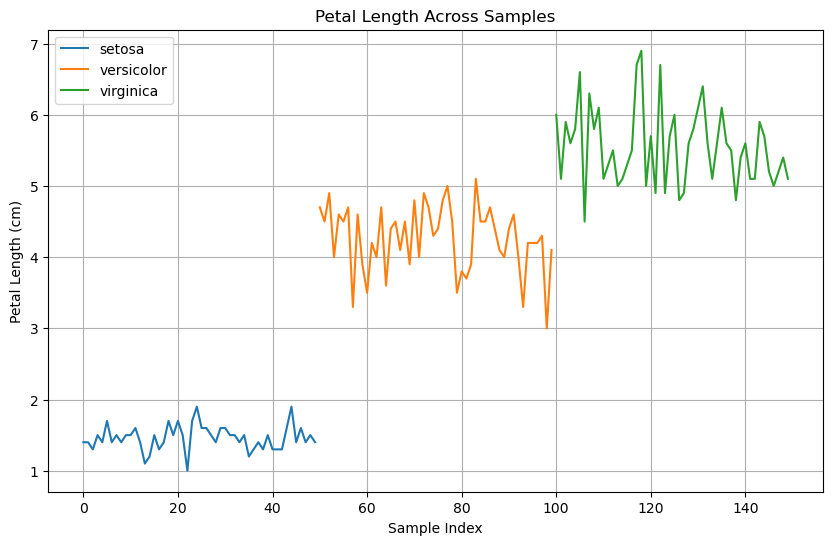

In [7]:
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['petal length (cm)'], label=species)

plt.title("Petal Length Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.grid(True)
plt.show()


**2. Bar Chart – Average Petal Length per Species**

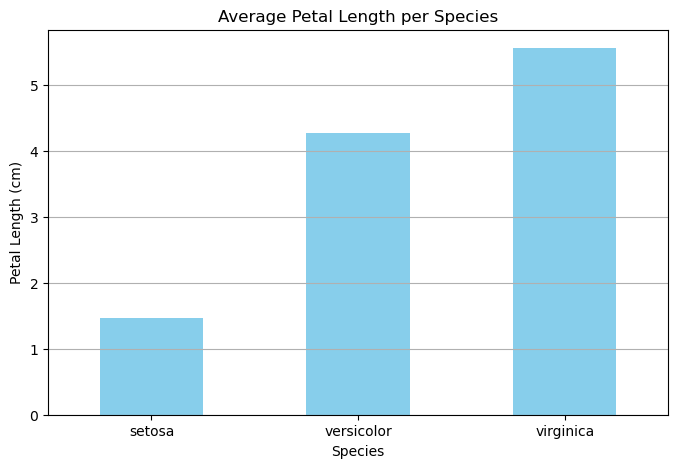

In [8]:
plt.figure(figsize=(8, 5))
grouped['petal length (cm)'].plot(kind='bar', color='skyblue')
plt.title("Average Petal Length per Species")
plt.ylabel("Petal Length (cm)")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**3. Histogram – Sepal Width Distribution**

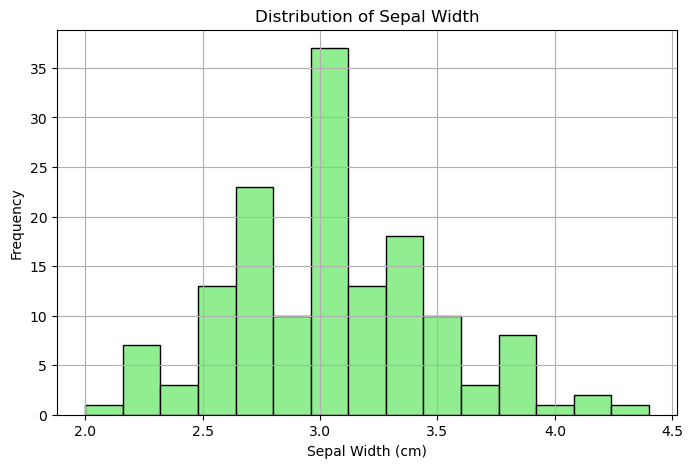

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['sepal width (cm)'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


**Scatter Plot – Sepal Length vs. Petal Length**

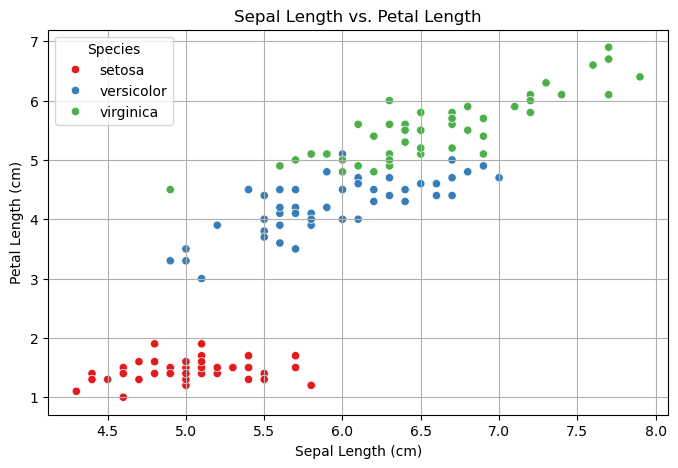

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set1')
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid(True)
plt.legend(title="Species")
plt.show()
